#### Importando bibliotecas

In [16]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 

#### Definir o caminho completo do arquivo TXT

In [17]:
diretorio = r'D:\Projetospy\projeto'
nome_arquivo = 'sinaisvitais003 100dias DV2 RAxxx1.txt'
caminho = os.path.join(diretorio, nome_arquivo)

#### Inicializar as listas que vão armazenar os dados

In [18]:
horas = []
batimentos_cardiacos = []
pressoes_arteriais = []
temperaturas_corporais = []

#### Abrir o arquivo TXT e ler as informações

In [19]:
with open(caminho, 'r', encoding='utf-8') as f:
    linhas = f.readlines()
    # Extrair as informações de cada linha do arquivo TXT
    for linha in linhas:
        dados = linha.split()
        horas.append(dados[0])
        batimentos_cardiacos.append(dados[1])
        pressoes_arteriais.append(dados[2])
        temperaturas_corporais.append(dados[3])

##### Criar o dataframe com as informações coletadas


In [20]:
data = {'Hr': horas, 'Bpm': batimentos_cardiacos, 'PA': pressoes_arteriais, 'TC': temperaturas_corporais}
df = pd.DataFrame(data)

#### Exportar o dataframe para arquivo CSV

In [21]:
df.to_csv('D:/Projetospy/projeto/dataset.csv', index=False)

##### Definir o caminho do arquivo CSV

In [22]:
caminho = r'D:\Projetospy/projeto/dataset.csv'

##### Ler o arquivo CSV e criar um dataframe

In [23]:
df = pd.read_csv(caminho)

####  Verificar se os valores estão dentro dos limites permitidos

In [24]:
def preparar_dados(df):
    # Verificar se os valores estaoo dentro dos limites permitidos
    for i in range(len(df)):
        if df.loc[i, 'Bpm'] < 0 or df.loc[i, 'Bpm'] > 100:
            # Substituir o valor pela media entre o valor antecessor e posterior
            df.loc[i, 'Bpm'] = (df.loc[i-1, 'Bpm'] + df.loc[i+1, 'Bpm'])/2
        if df.loc[i, 'PA'] < 0 or df.loc[i, 'PA'] > 20:
            # Substituir o valor pela media entre o valor antecessor e posterior
            df.loc[i, 'PA'] = (df.loc[i-1, 'PA'] + df.loc[i+1, 'PA'])/2
        if df.loc[i, 'TC'] < 0 or df.loc[i, 'TC'] > 40:
            # Substituir o valor pela media entre o valor antecessor e posterior
            df.loc[i, 'TC'] = (df.loc[i-1, 'TC'] + df.loc[i+1, 'TC'])/2
    return df

#### Aplicar a funcao preparar_dados ao dataframe

In [25]:
df = preparar_dados(df)

#### # Gerar uma amostra aleatoria com 1000 linhas (480, 960, 1920, 3840, 7680 )

In [26]:
dfa = df.sample(n=960, random_state=42)

####  Gerar uma amostra aleatoria com 1000 linhas (480, 960, 1920, 3840, 7680 )

In [27]:
dfa = df.sample(n=960, random_state=42)

#### Salvar o dataset de amostra em um arquivo CSV

In [28]:
dfa.to_csv("D:/Projetospy/projeto/dataset_amostra.csv", index=False)

#### Converter as colunas para numericas

In [29]:
dfa['Bpm'] = pd.to_numeric(dfa['Bpm'], errors='coerce')
dfa['PA'] = pd.to_numeric(dfa['PA'], errors='coerce')
dfa['TC'] = pd.to_numeric(dfa['TC'], errors='coerce')

#### Segmentar os dados em pacotes de 24 amostras

In [30]:
num_linhas = dfa.to_numpy().shape[0]
pacotes = dfa.to_numpy().reshape(-1, 160, 3)
pad_value = np.nan
pad = ((0, num_linhas * 24 - dfa.shape[0]), (0, 0))
pad = [(0, 0)] + [(p, p) for p in pad] + [(0, 0)]
pacotes = np.pad(pacotes, pad_width=((0,0),(0,0),(0,2)), mode='constant', constant_values=pad_value)

####  Calcular a media do batimento cardiaco em cada pacote

In [31]:
media_bpm = np.nanmean(pacotes[:,:,0], axis=1)

#### Calculo da correlacao entre batimentos cardiacos e pressao arterial

In [32]:
def calcular_correlacao(dfa):
    # Calculo da correlacao entre batimentos cardiacos e pressao arterial
    corr = np.corrcoef(dfa['Bpm'], dfa['PA'])[0, 1]
    
    # Adicionar a coluna "correlacao" ao dataframe
    dfa['correlacao'] = corr
    
    # Verificar o critério de tomada de decisão
    media_bpm = np.nanmean(pacotes[:,:,0], axis=1)
    if media_bpm.mean() > 80 and data['PA'].mean() > 16:
        print('Alerta! Batimento cardíaco elevado e pressão arterial elevada')
    
    return dfa

#### Exemplo de uso da funcao

In [33]:
dfa = calcular_correlacao(dfa)
print(dfa)

      Hr        Bpm         PA         TC  correlacao
2037  21  70.233690  11.640289  37.162805    0.911413
1978  10  70.360617  12.091771  36.905245    0.911413
855   15  73.985231  13.578451  37.101921    0.911413
1719  15  71.443660  13.123731  37.125112    0.911413
2019   3  65.185993   9.941167  36.514719    0.911413
...   ..        ...        ...        ...         ...
1999   7  67.717796  12.204705  37.088335    0.911413
1018  10  71.958373  13.095798  37.110881    0.911413
2375  23  70.605875  11.645662  37.075997    0.911413
1163  11  72.651832  13.029029  37.005571    0.911413
990    6  69.947094  11.262863  36.689328    0.911413

[960 rows x 5 columns]


#### Exemplo de uso da funcao
# Leitura do arquivo de dados

In [34]:
data = dfa

#### Dividir em pacotes de 24 amostras para cada parametro

In [35]:
bc = [data["Bpm"][i:i+24] for i in range(0, len(data), 24)]
pa = [data["PA"][i:i+24] for i in range(0, len(data), 24)]
tc = [data["TC"][i:i+24] for i in range(0, len(data), 24)]

####  Aplicar ferramentas estatasticas descritivas

In [36]:
for i in range(len(bc)):
    print("Estatasticas descritivas para o pacote", i+1, "de Bpm:")
    print("Media:", np.mean(bc[i]))
    print("Desvio padrao:", np.std(bc[i]))
    print("Minimo:", np.min(bc[i]))
    print("Maximo:", np.max(bc[i]))
    print("")

for i in range(len(pa)):
    print("Estatisticas descritivas para o pacote", i+1, "de PA:")
    print("Media:", np.mean(pa[i]))
    print("Desvio padrao:", np.std(pa[i]))
    print("Minimo:", np.min(pa[i]))
    print("Maximo:", np.max(pa[i]))
    print("")

for i in range(len(tc)):
    print("Estatasticas descritivas para o pacote", i+1, "de TC:")
    print("Media:", np.mean(tc[i]))
    print("Desvio padrao:", np.std(tc[i]))
    print("Minimo:", np.min(tc[i]))
    print("Maximo:", np.max(tc[i]))
    print("")

Estatasticas descritivas para o pacote 1 de Bpm:
Media: 70.16184727725678
Desvio padrao: 2.4012970126466344
Minimo: 65.18599288115851
Maximo: 73.98523071123373

Estatasticas descritivas para o pacote 2 de Bpm:
Media: 70.7999826353607
Desvio padrao: 1.618352441917532
Minimo: 67.07621052724338
Maximo: 73.68507239548025

Estatasticas descritivas para o pacote 3 de Bpm:
Media: 69.68252240157332
Desvio padrao: 2.38705712530366
Minimo: 64.61248288649026
Maximo: 73.16735628179035

Estatasticas descritivas para o pacote 4 de Bpm:
Media: 70.23541230380009
Desvio padrao: 2.1133063598635733
Minimo: 65.36173356195047
Maximo: 73.26405357935548

Estatasticas descritivas para o pacote 5 de Bpm:
Media: 70.26638259344381
Desvio padrao: 2.3843303087499357
Minimo: 63.03017476072196
Maximo: 73.30298166471535

Estatasticas descritivas para o pacote 6 de Bpm:
Media: 70.04044771185256
Desvio padrao: 2.511884627543151
Minimo: 65.15107960789337
Maximo: 73.92271507731792

Estatasticas descritivas para o pacote 

#### Carregar o dataset de amostra

In [37]:
dfa = pd.read_csv("D:/Projetospy/projeto/dataset_amostra.csv")

#### Plotar um grafico de linhas com os valores de Bpm da amostra

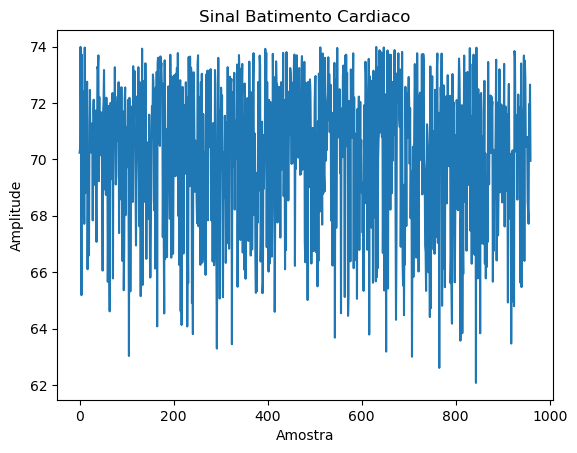

In [38]:
plt.plot(dfa["Bpm"])
plt.title("Sinal Batimento Cardiaco")
plt.xlabel("Amostra")
plt.ylabel("Amplitude")
plt.show()#### Carregar o dataset de amostra

####  Plotar um grafico de linhas com os valores de PA da amostra

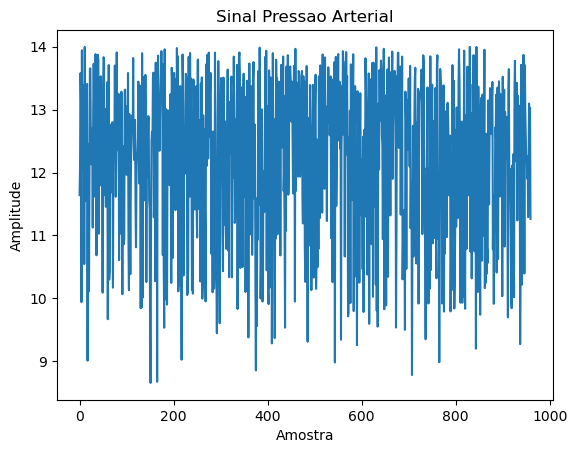

In [39]:
plt.plot(dfa["PA"])
plt.title("Sinal Pressao Arterial")
plt.xlabel("Amostra")
plt.ylabel("Amplitude")
plt.show()#### Plotar um grafico de linhas com os valores de Bpm da amostra

#### Plotar um grafico de linhas com os valores de TC da amostra

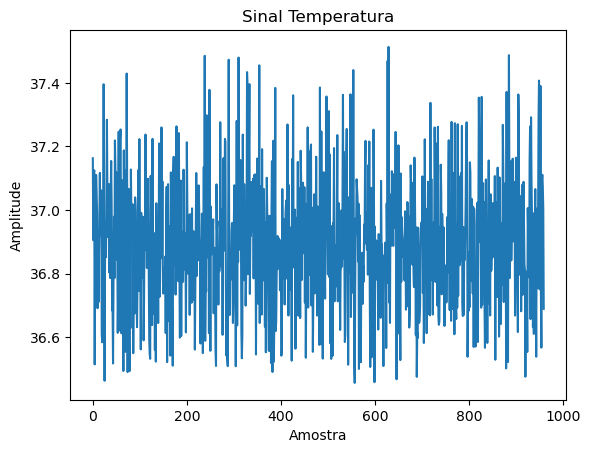

In [40]:
plt.plot(dfa["TC"])
plt.title("Sinal Temperatura")
plt.xlabel("Amostra")
plt.ylabel("Amplitude")
plt.show()####  Plotar um grafico de linhas com os valores de PA da amostra